**Importing Libraries and Datasets**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import math
from pycaret.classification import *
from scipy.stats import norm, skew
import warnings 
warnings.filterwarnings('ignore')

df_diab = pd.read_csv("C:/Users/SOUBHIK MANDAL/Desktop/Data Analysis of Prediction of Medical Condition/dataset/diabetes.csv")
df_diab

**What is in this dataset**

In [4]:
df_diab.info()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df_diab.describe().T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**Checking for missing values**

In [7]:
df_diab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

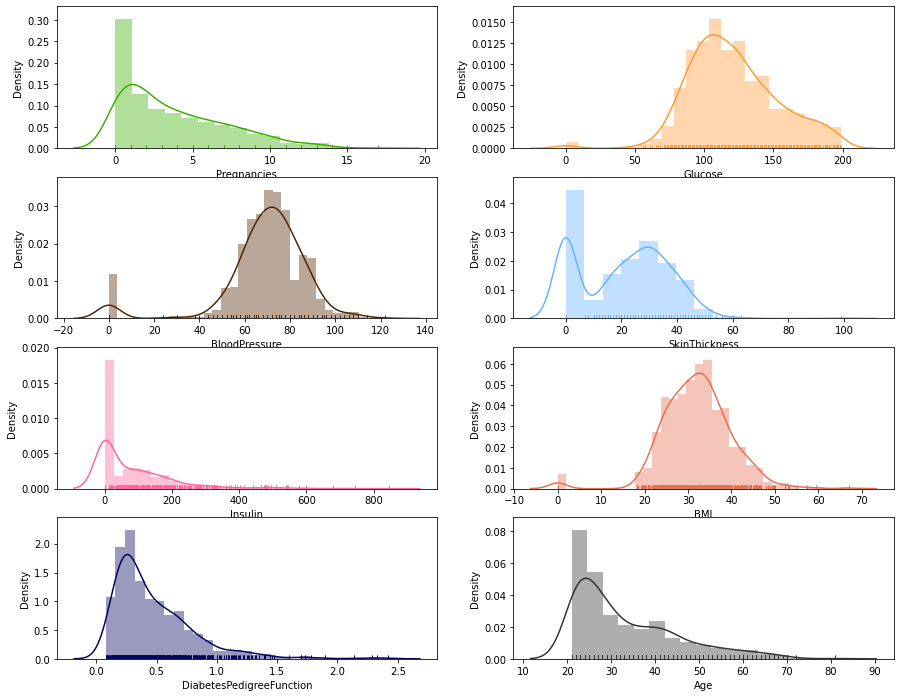

In [8]:
fig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()
sns.distplot(df_diab['Pregnancies'],rug=True,color='#38b000',ax=axs[0])
sns.distplot(df_diab['Glucose'],rug=True,color='#FF9933',ax=axs[1])
sns.distplot(df_diab['BloodPressure'],rug=True,color='#522500',ax=axs[2])
sns.distplot(df_diab['SkinThickness'],rug=True,color='#66b3ff',ax=axs[3])
sns.distplot(df_diab['Insulin'],rug=True,color='#FF6699',ax=axs[4])
sns.distplot(df_diab['BMI'],color='#e76f51',rug=True,ax=axs[5])
sns.distplot(df_diab['DiabetesPedigreeFunction'],color='#03045e',rug=True,ax=axs[6])
sns.distplot(df_diab['Age'],rug=True,color='#333533',ax=axs[7])
plt.show()

In [9]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target = ['Outcome']
df_diab[features] = df_diab[features].replace(0,np.NaN)
df_diab.isna().sum()

<AxesSubplot:>

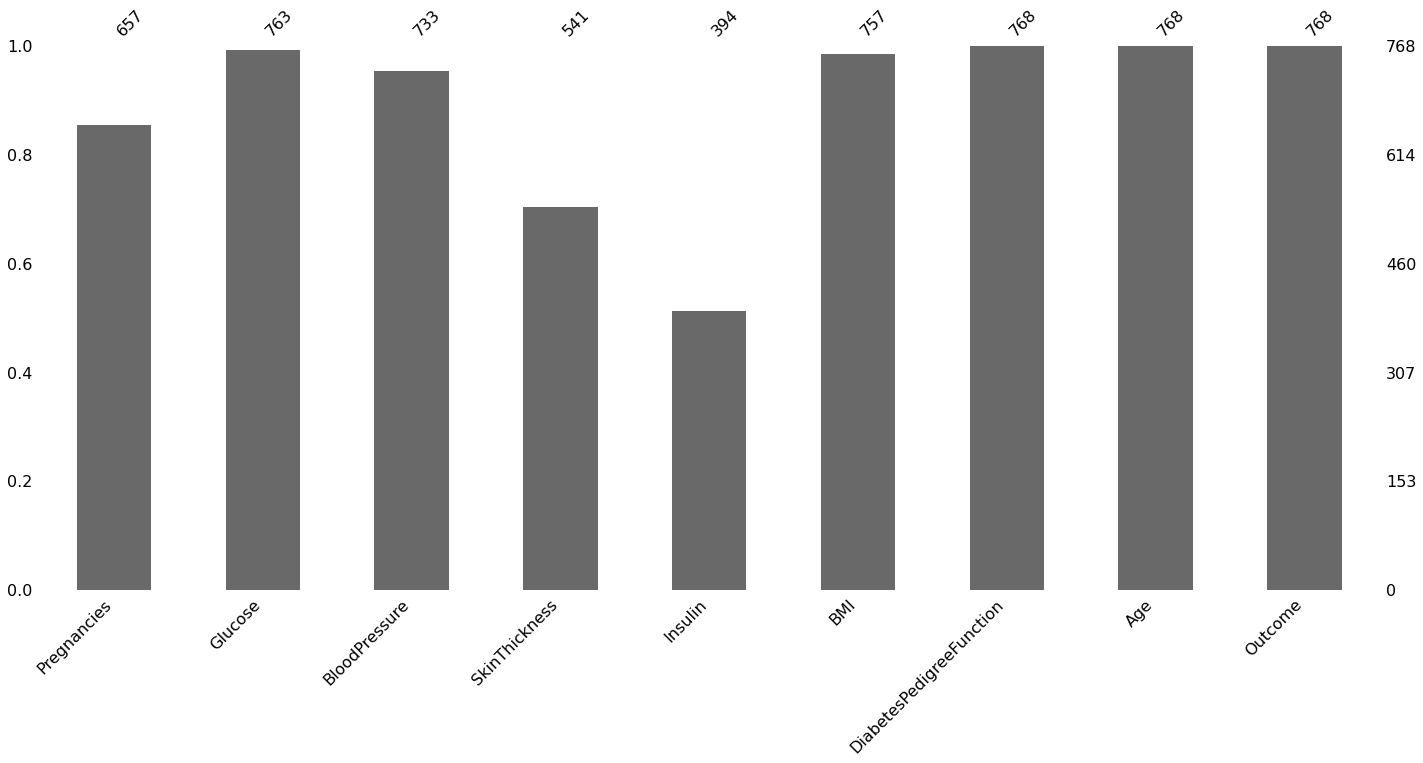

In [13]:
msno.bar(df_diab)

In [14]:
df_diab.isnull().sum()/len(df_diab)*100 

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

**Checking for outliers**

In [15]:
bmi_outliers=df_diab[df_diab['BMI']>40]
bmi_outliers['BMI'].shape

(96,)

In [16]:
df_diab[df_diab['BMI']>40].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,63.000000,95.000000,91.000000,70.000000,54.000000,96.000000,96.000000,96.000000,96.000000
mean,4.952381,134.873684,78.582418,39.457143,195.796296,44.787500,0.610990,31.781250,0.562500
std,4.097318,30.489706,14.745294,7.924802,139.045314,4.406317,0.441228,9.263628,0.498682
min,1.000000,67.000000,30.000000,23.000000,14.000000,40.100000,0.089000,21.000000,0.000000
25%,1.000000,112.500000,71.000000,35.000000,106.250000,42.175000,0.283500,24.750000,0.000000
50%,4.000000,135.000000,78.000000,39.500000,157.500000,43.450000,0.511500,28.000000,1.000000
75%,7.500000,155.000000,87.000000,43.000000,247.500000,46.100000,0.765500,38.000000,1.000000
max,17.000000,199.000000,114.000000,63.000000,680.000000,67.100000,2.420000,58.000000,1.000000


In [17]:
df_diab["BMI"] = df_diab["BMI"].apply(lambda x: df_diab.BMI.mean() if x>40 else x)

In [18]:
df_diab.BMI.replace(to_replace=np.nan,value=df_diab.BMI.mean(), inplace=True)
df_diab.Pregnancies.replace(to_replace=np.nan,value=df_diab.Pregnancies.mean(), inplace=True)
df_diab.Glucose.replace(to_replace=np.nan,value=df_diab.Glucose.mean(), inplace=True)
df_diab.BloodPressure.replace(to_replace=np.nan,value=df_diab.BloodPressure.mean(), inplace=True)
df_diab.SkinThickness.replace(to_replace=np.nan,value=df_diab.SkinThickness.mean(), inplace=True)
df_diab.Insulin.replace(to_replace=np.nan,value=df_diab.Insulin.mean(), inplace=True)
df_diab.isna().sum()

**Data Exploration for the Dataset**

In [20]:
labels = df_diab['Outcome'].value_counts().index.tolist()[:2]
values = df_diab['Outcome'].value_counts().tolist()[:2]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.05])])
fig.show()

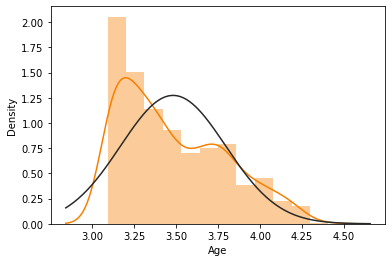

In [21]:
df_diab['Age'] = np.log1p(df_diab['Age'])
sns.distplot(df_diab['Age'], fit=norm,color='#f77f00');

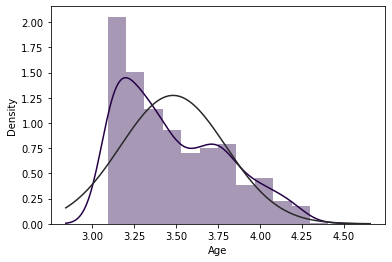

In [22]:
df_diab['DiabetesPedigreeFunction'] = np.log1p(df_diab['DiabetesPedigreeFunction'])
sns.distplot(df_diab['Age'], fit=norm,color='#240046');

In [23]:
print ("Unique values are:\n",df_diab.nunique())

Unique values are:
 Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         189
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


<AxesSubplot:xlabel='Glucose', ylabel='Age'>

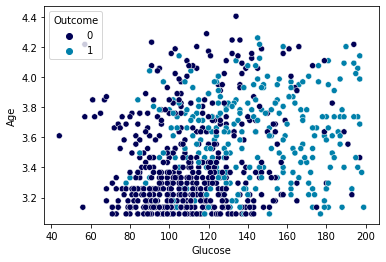

In [24]:
sns.scatterplot(x = df_diab['Glucose'],y = df_diab['Age'],hue = "Outcome",data = df_diab,palette="ocean")

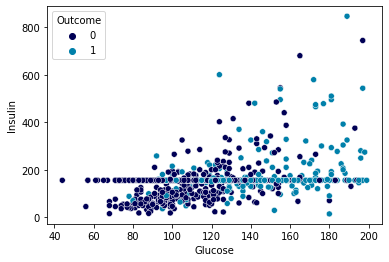

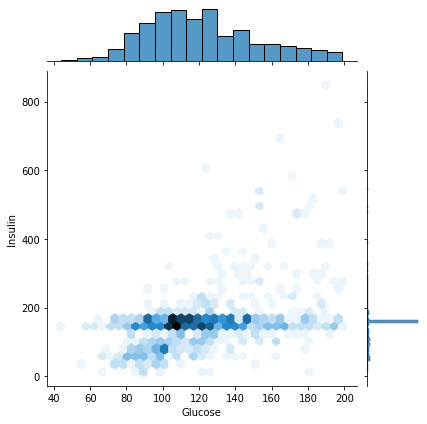

In [25]:
sns.scatterplot(x = df_diab['Glucose'],y = df_diab['Insulin'],hue = "Outcome",data = df_diab,palette="ocean")
sns.jointplot('Glucose','Insulin',data = df_diab,kind='hex',palette="ocean")

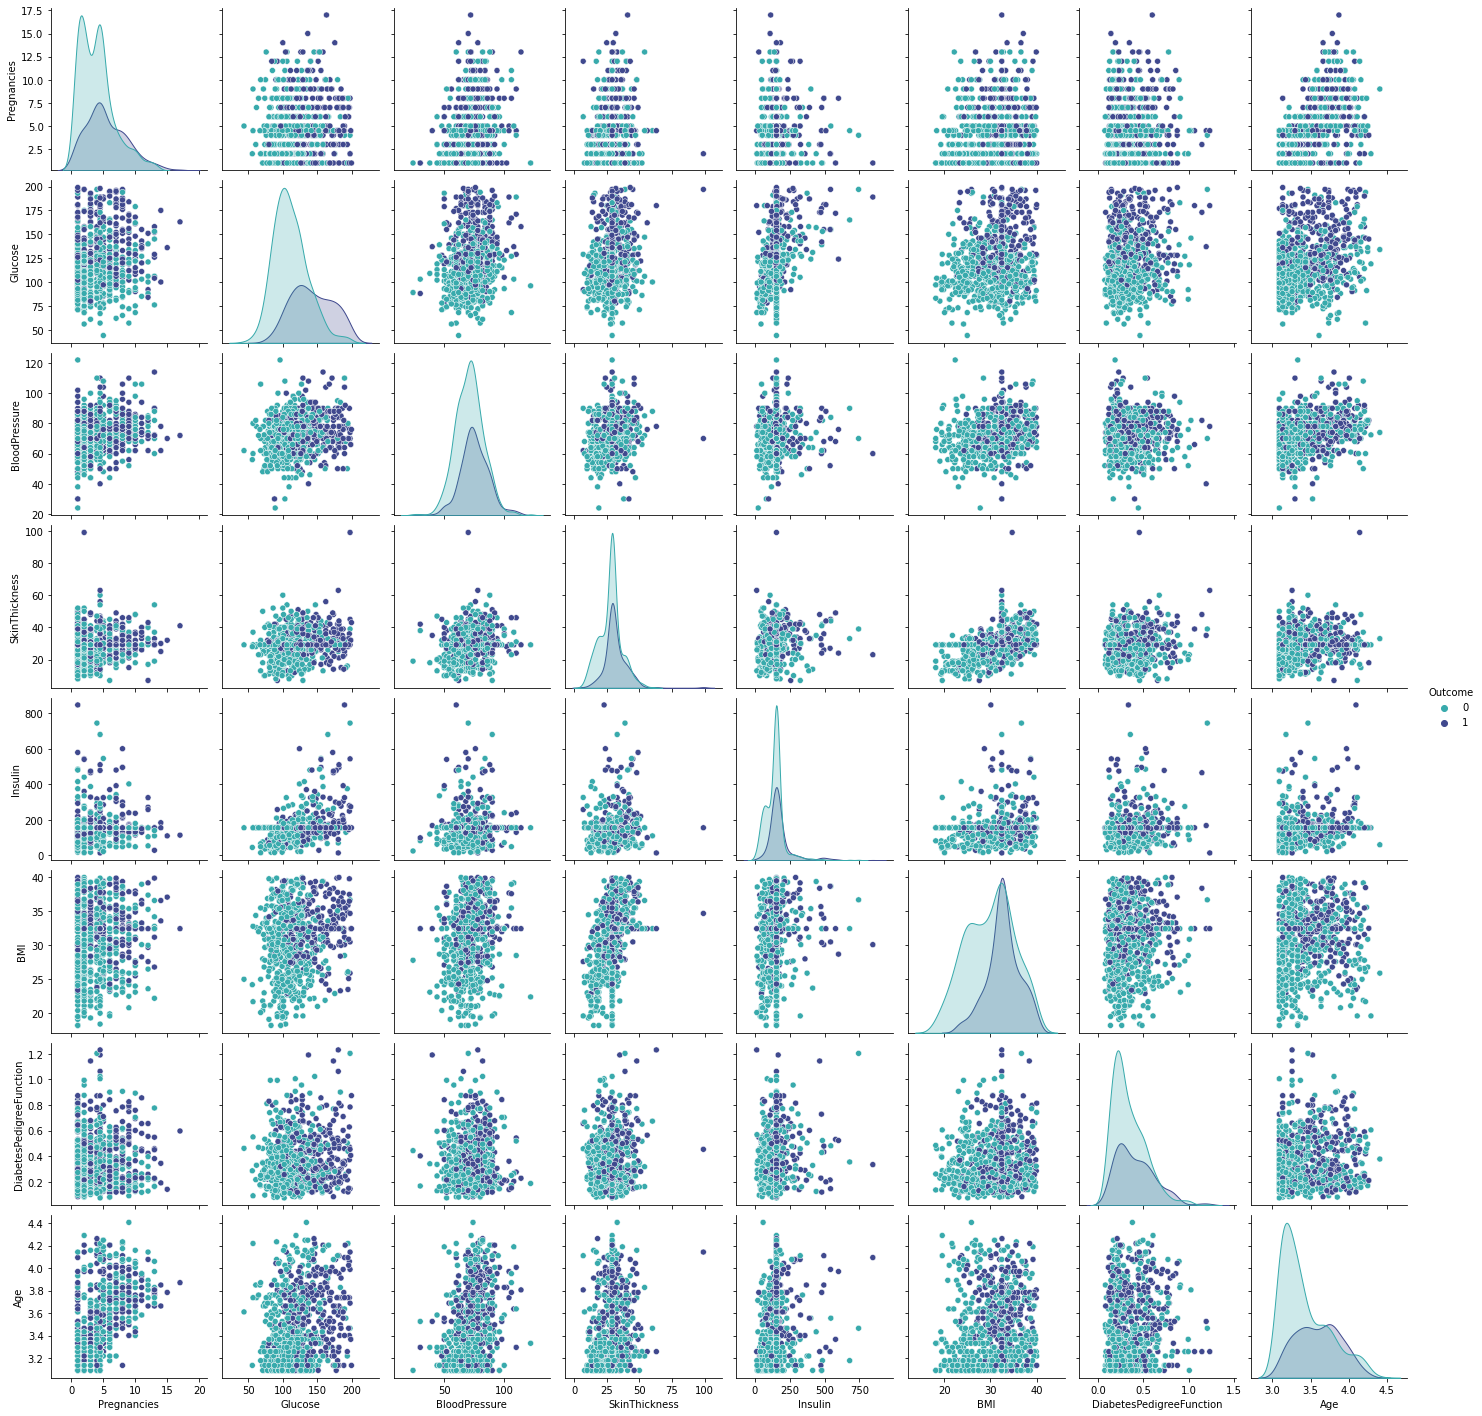

In [26]:
sns.pairplot(df_diab, hue='Outcome',palette="mako_r")

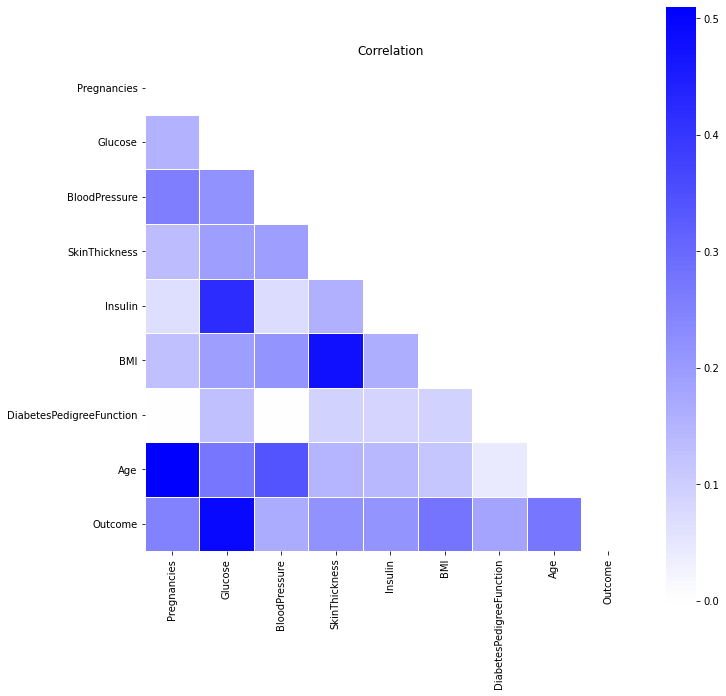

In [27]:
plt.figure(figsize=(11,11))
corr=df_diab.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='bwr_r', robust=True, center=0,square=True, linewidths=.6)
plt.title('Correlation')
plt.show()

In [30]:
diab = setup(data = df_diab,target = 'Outcome',normalize=True, session_id=1)

,Description,Value
0,session_id,1
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [31]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7635,0.8127,0.5567,0.6926,0.6141,0.4471,0.4548,0.3420
lda,Linear Discriminant Analysis,0.7580,0.8029,0.5135,0.6964,0.5886,0.4234,0.4346,0.0110
ridge,Ridge Classifier,0.7524,0.0000,0.4974,0.6901,0.5754,0.4079,0.4202,0.0100
et,Extra Trees Classifier,0.7487,0.8088,0.5406,0.6597,0.5895,0.4127,0.4191,0.2920
lr,Logistic Regression,0.7468,0.8074,0.5023,0.6729,0.5728,0.3987,0.4087,0.3800
gbc,Gradient Boosting Classifier,0.7413,0.7954,0.5798,0.6352,0.6035,0.4127,0.4154,0.0690
nb,Naive Bayes,0.7412,0.8059,0.5848,0.6423,0.6066,0.4152,0.4203,0.0100
catboost,CatBoost Classifier,0.7336,0.8114,0.5357,0.6303,0.5736,0.3837,0.3892,1.3410
lightgbm,Light Gradient Boosting Machine,0.7318,0.7942,0.5684,0.6160,0.5893,0.3913,0.3932,0.1370
qda,Quadratic Discriminant Analysis,0.7282,0.7978,0.5035,0.6265,0.5555,0.3641,0.3700,0.0110


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [32]:
rf = create_model('rf', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7593,0.7519,0.5263,0.7143,0.6061,0.4384,0.4490
1,0.7778,0.7669,0.6842,0.6842,0.6842,0.5128,0.5128
2,0.8148,0.8398,0.5789,0.8462,0.6875,0.5624,0.5828
3,0.7037,0.7454,0.5556,0.5556,0.5556,0.3333,0.3333
4,0.8148,0.8573,0.6667,0.7500,0.7059,0.5714,0.5735
5,0.7963,0.8835,0.6111,0.7333,0.6667,0.5217,0.5262
6,0.7037,0.7894,0.3889,0.5833,0.4667,0.2727,0.2835
7,0.7547,0.8254,0.5556,0.6667,0.6061,0.4301,0.4339
8,0.7736,0.8405,0.5000,0.7500,0.6000,0.4508,0.4688
9,0.7358,0.8270,0.5000,0.6429,0.5625,0.3775,0.3836


In [33]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.7489,0.7368,0.5185,0.6087,0.3333,0.3490
1,0.6852,0.7586,0.7368,0.5385,0.6222,0.3634,0.3766
2,0.8148,0.8511,0.7368,0.7368,0.7368,0.5940,0.5940
3,0.7222,0.7870,0.7778,0.5600,0.6512,0.4304,0.4464
4,0.7407,0.8519,0.8889,0.5714,0.6957,0.4878,0.5241
5,0.7778,0.8812,0.9444,0.6071,0.7391,0.5610,0.6028
6,0.8148,0.8333,0.7778,0.7000,0.7368,0.5946,0.5966
7,0.7358,0.7976,0.6667,0.6000,0.6316,0.4266,0.4280
8,0.7925,0.8651,0.7222,0.6842,0.7027,0.5435,0.5439
9,0.8113,0.8143,0.8333,0.6818,0.7500,0.6009,0.6087


In [34]:
tuned_rf

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.002,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=70, n_jobs=-1, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

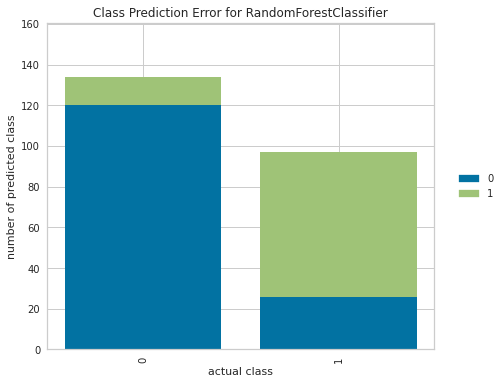

In [35]:
plot_model(tuned_rf, plot = 'error')

In [36]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

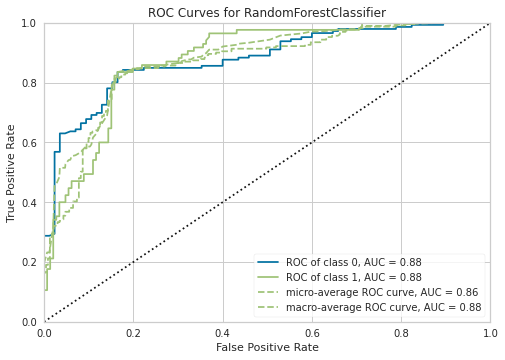

In [37]:
plot_model(tuned_rf, plot = 'auc')

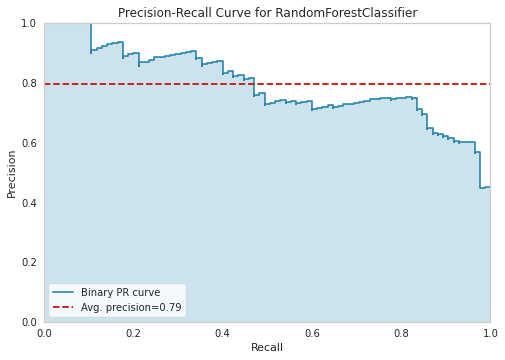

In [38]:
plot_model(tuned_rf, plot = 'pr')

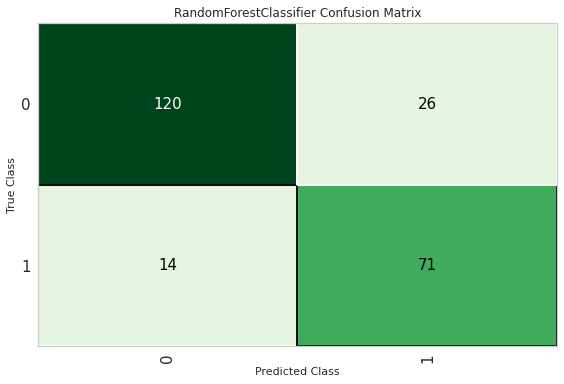

In [39]:
plot_model(tuned_rf, plot = 'confusion_matrix')

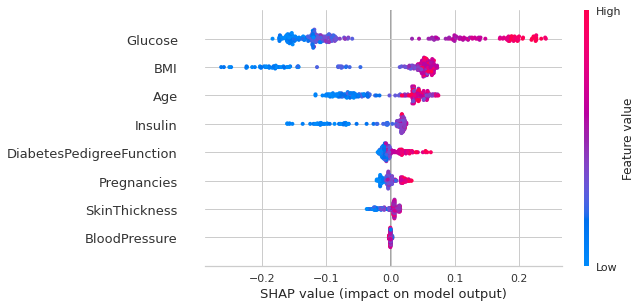

In [40]:
interpret_model(tuned_rf)

In [41]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8268,0.8786,0.8353,0.7320,0.7802,0.6384,0.6422
